In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
import mimetypes
import cv2

In [9]:
!file /content/dataset.zip


/content/dataset.zip: Zip archive data, at least v2.0 to extract, compression method=store


In [10]:
!ls -lh /content/dataset.zip


-rw-r--r-- 1 root root 832M Jun 19 10:18 /content/dataset.zip


In [16]:
import shutil
shutil.unpack_archive('/content/dataset.zip', 'extracted_images')

In [12]:
!unzip -l /content/dataset.zip

Archive:  /content/dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/dataset.zip or
        /content/dataset.zip.zip, and cannot find /content/dataset.zip.ZIP, period.


In [17]:
zip_path = '/content/dataset.zip'
extract_folder = 'extracted_images'
with zipfile.ZipFile(zip_path, 'r') as zip_fil:
    zip_fil.extractall(extract_folder)

In [34]:
# Helper function: preprocess image
def preprocess_image(image_path, size=(256, 256)):
    original = cv2.imread(image_path)
    resized = cv2.resize(original, size)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    normalized = gray / 255.0
    blurred = cv2.GaussianBlur(normalized, (7, 7), 0)
    return original, gray, normalized, blurred

In [35]:
image_paths = []
for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

print(f"Found {len(image_paths)} images.")


Found 2701 images.


In [36]:
# Visualize sample images
def visualize_images(image_paths, num_images=5):
    for i, img_path in enumerate(image_paths[:num_images]):
        original, gray, normalized, blurred = preprocess_image(img_path)

        plt.figure(figsize=(12, 4))
        plt.suptitle(f"Image {i+1}: {os.path.basename(img_path)}", fontsize=14)

        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis('off')

        plt.subplot(1, 4, 2)
        plt.imshow(gray, cmap='gray')
        plt.title("Grayscale")
        plt.axis('off')

        plt.subplot(1, 4, 3)
        plt.imshow(normalized, cmap='gray')
        plt.title("Normalized")
        plt.axis('off')

        plt.subplot(1, 4, 4)
        plt.imshow(blurred, cmap='gray')
        plt.title("Gaussian Blurred")
        plt.axis('off')

        plt.tight_layout()
        plt.show()


In [37]:
# Step 2: Collect all image file paths
image_paths = []
for root, _, files in os.walk(extract_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

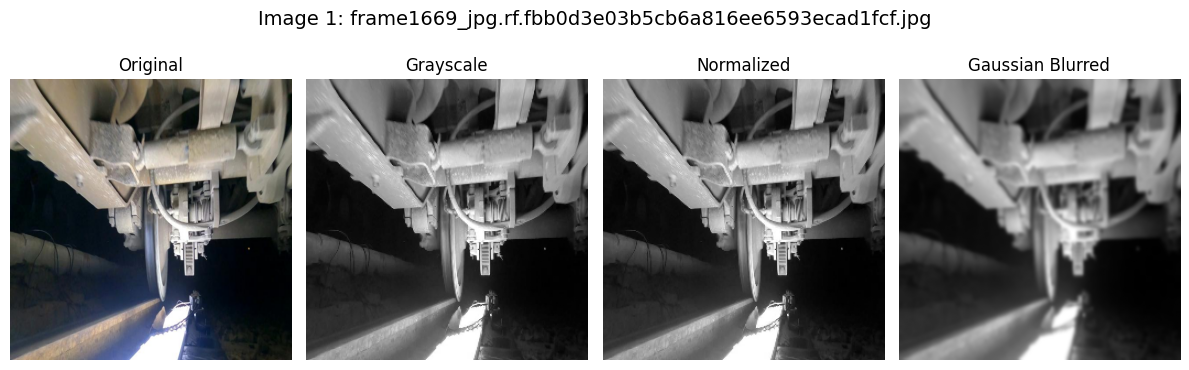

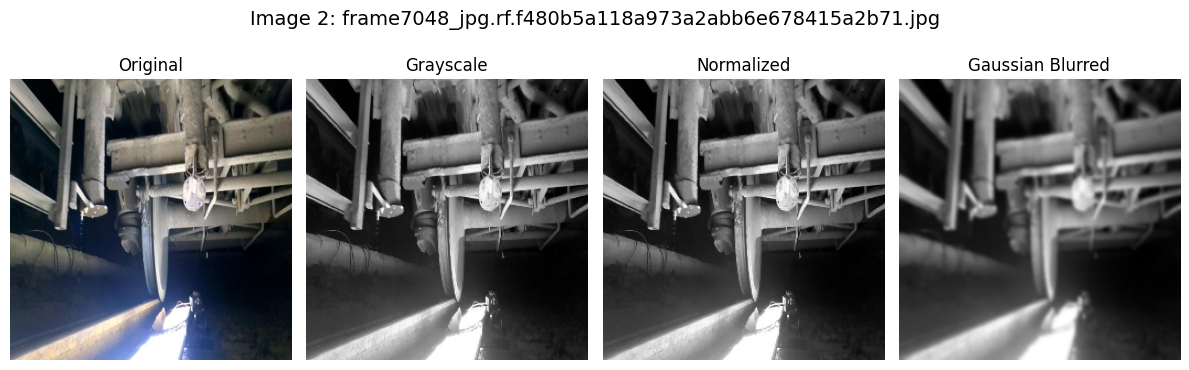

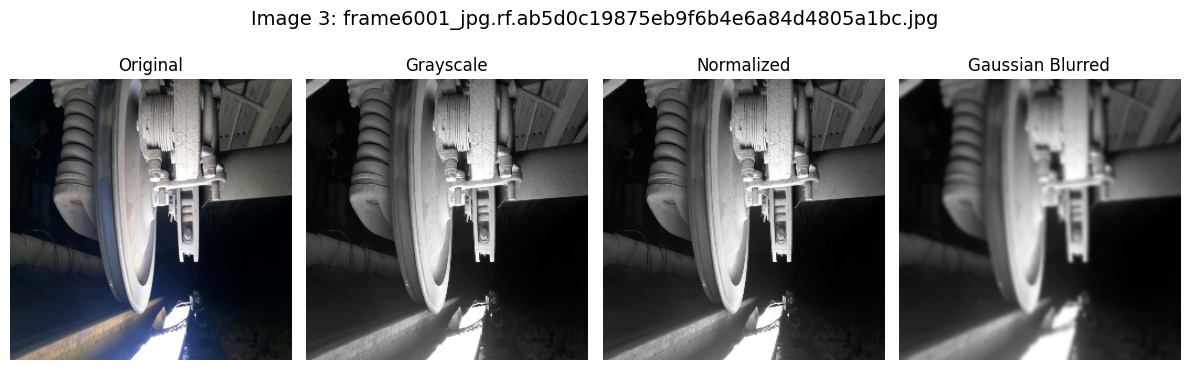

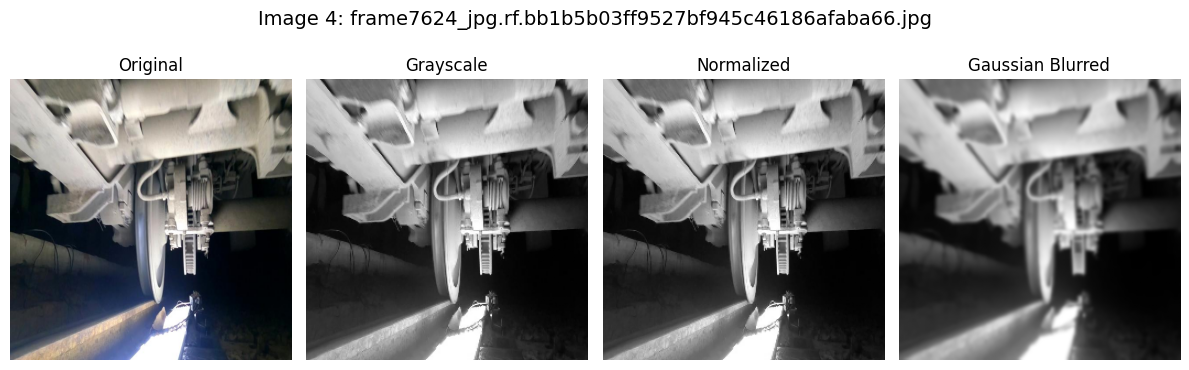

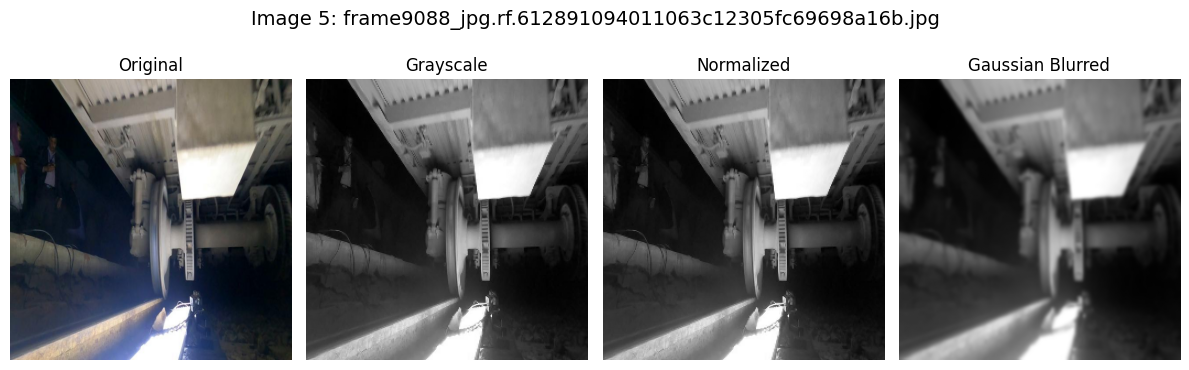

In [38]:
# Step 3: Visualize
visualize_images(image_paths, num_images=5)